<a href="https://colab.research.google.com/github/jonathanahc/Practicas/blob/main/Pr%C3%A1ctica23Regresi%C3%B3nLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Herrera Castro Jonathan Adrian
*   Matrícula: 255497

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 ***Parte 1: Carga de datos y bibliotecas***

**1. Importa las bibliotecas necesarias**

In [78]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import scipy.stats as stats

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Carga el archivo `restaurantes.csv`**



In [79]:
df = pd.read_csv('/content/drive/MyDrive/Unidad04/restaurantes.csv', engine='python')

**3. Muestra las primeras filas del dataframe**

In [80]:
df.head()

,poblation,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


**4. Describe estadísticamente el conjunto de datos**

In [81]:
df.describe()

,poblation,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [82]:
poblation_moda = df['poblation'].mode().iloc[0]
profit_moda = df['profit'].mode().iloc[0]

poblation_mediana = df['poblation'].median()
profit_mediana = df['profit'].median()

poblation_rango = df['poblation'].max() - df['poblation'].min()
profit_rango = df['profit'].max() - df['profit'].min()

poblation_varianza = df['poblation'].var()
profit_varianza = df['profit'].var()


print(f"Poblation Moda: {poblation_moda}")
print(f"Profit Mode: {profit_moda}")
print("\n")
print(f"Poblation Mediana: {poblation_mediana}")
print(f"Profit Mediana: {profit_mediana}")
print("\n")
print(f"Poblation Rango: {poblation_rango:.4f}")
print(f"Profit Rango: {profit_rango:.4f}")
print("\n")
print(f"Poblation Varianza: {poblation_varianza:.4f}")
print(f"Profit Varianza: {profit_varianza:.4f}")

Poblation Moda: 5.0269
Profit Mode: -2.6807


Poblation Mediana: 6.5894
Profit Mediana: 4.5623


Poblation Rango: 17.1761
Profit Rango: 26.8277


Poblation Varianza: 14.9760
Profit Varianza: 30.3630


In [83]:
df.dtypes

,0
poblation,float64
profit,float64


In [84]:
df.isnull().sum()

,0
poblation,0
profit,0


##  ***Parte 2: Análisis exploratorio y relación entre variables***


###**2.1 Análisis de la Relación Lineal Entre Variable Dependiente y la Independiente**###

**1. Gráfica un diagrama de dispersión en `poblation` y `profit`**

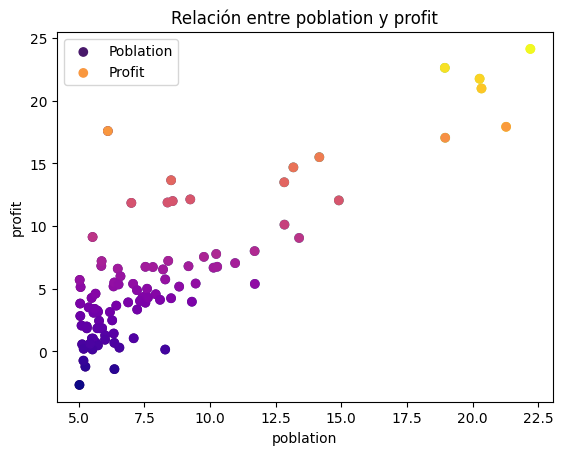

In [85]:
plt.scatter(df['poblation'], df['profit'], c=df['poblation'], cmap='viridis', label='Poblation')
plt.scatter(df['poblation'], df['profit'], c=df['profit'], cmap='plasma', label='Profit')
plt.xlabel('poblation')
plt.ylabel('profit')
plt.title('Relación entre poblation y profit')
plt.legend()
plt.show()

**2. Responde:**

¿La relación entre las variables parece lineal? ¿Por qué?

Según el diagrama de dispersión, se observa una tendencia general ascendente debido a que si aumenta poblation, la variable profit también aumenta sin embargo, no es completamente lineal porque hay algunos puntos que se desvían de la tendencia pero se puede decir que es una correlación moderada.

### **2.2: Cálculo e interpretación de la correlación**


**1. Calcula e imprime el coeficiente de correlación de Pearson entre `poblation` y `profit`**

In [88]:
correlacion = df['profit'].corr(df['poblation'])

print(f"El coeficiente de correlación de Pearson entre poblation y profit es: {correlacion:.4f}")

El coeficiente de correlación de Pearson entre poblation y profit es: 0.8379


**2. Interpreta el resultado:**

- ¿Qué tan fuerte es la relación?

  Un valor de este tipo indica una correlación fuerte.


- ¿Es positiva o negativa?

  Es positiva.


- ¿Es coherente con el gráfico anterior?

  Sí, si es coherente ya que comparando la gráfica y el coeficiente tienen tendencia a aumentar.

## ***Parte 3: Construcción del modelo, coeficientes y visualización***


### **3.1 Construcción del modelo - obtención de los parámetros y coeficientes**



**1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn**

In [89]:
model = LinearRegression()
model.fit(df[['profit']], df['poblation'])

LinearRegression()

**2. Imprime el intercepto y el coeficiente de la regresión (pendiente)**

In [90]:
print(f"Intercepto (b0): {model.intercept_:.4f}")
print(f"Coeficiente (b1): {model.coef_[0]:.4f}")

Intercepto (b0): 4.7238
Coeficiente (b1): 0.5884


**3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?**

Representa la ganancia predicha del restaurante cuando la población de la ciudad es cero.  En este contexto, un intercepto de 4,7238 significa que se predice una ganancia promedio cuando la población de la ciudad es nula.

**4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?**

Representa el cambio en la ganacia del restaurante por cada unidad de incremento en la población de la ciudad.

### ***3.2 Visualización del modelo***
**1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada**

**2. Asegúrate de incluir leyenda y títulos**

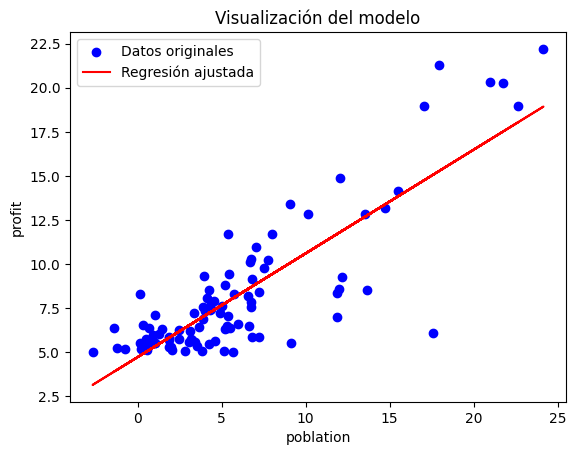

In [91]:
y_pred = model.predict(df[['profit']])
plt.scatter(df['profit'], df['poblation'], color='blue', label='Datos originales')
plt.plot(df['profit'], y_pred, color='red', label='Regresión ajustada')
plt.xlabel('poblation')
plt.ylabel('profit')
plt.title('Visualización del modelo')
plt.legend()
plt.show()

## ***Parte 4: Supuestos del modelo de regresión lineal***


###**4.1 Normalidad de los residuos**

**1. Calcula los residuos (reales - predichos)**

In [92]:
df.loc[:, 'y_pred'] = model.predict(df[['profit']])
df.loc[:, 'residuo'] = df['poblation'] - df['y_pred']

**2. Grafica un histograma con KDE de los residuos**

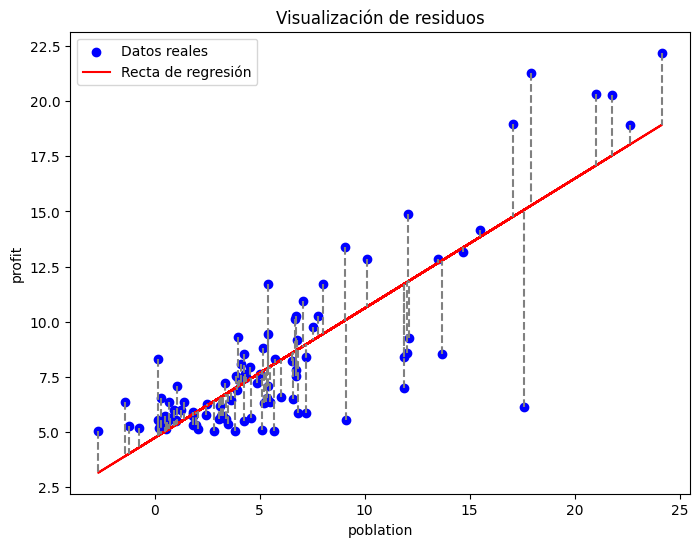

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(df['profit'], df['poblation'], color='blue', label='Datos reales')
plt.plot(df['profit'], df['y_pred'], color='red', label='Recta de regresión')

for i in range(len(df)):
  plt.plot([df.loc[i, 'profit'], df.loc[i, 'profit']], [df.loc[i, 'poblation'], df.loc[i, 'y_pred']], color='gray', linestyle='--')

plt.title('Visualización de residuos')
plt.xlabel('poblation')
plt.ylabel('profit')
plt.legend()
plt.show()

**3. Responde: ¿Los residuos siguen una distribución normal?**

En cierta forma no se podría asegurar que los residuos siguen una distribución normal, sin embargo en base a la visualización indica que son normales.

### ***4.2. Homocedasticidad***
**1. Grafica los residuos vs valores predichos**

Text(0, 0.5, 'Residuo')

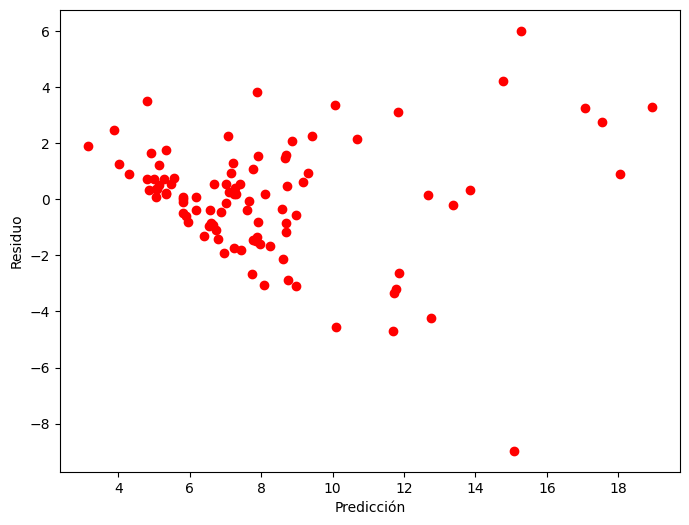

In [98]:
plt.figure(figsize=(8, 6))
plt.scatter(df['y_pred'], df['residuo'], color='red', label='Datos Reales')
plt.xlabel('Predicción')
plt.ylabel('Residuo')

**2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?**

Según la gráfica, los residuos están distribuidos aleatoriamente.

### **4.3. Q-Q Plot para evaluar la normalidad**


**1. Gráfica el Q-Q Plot**

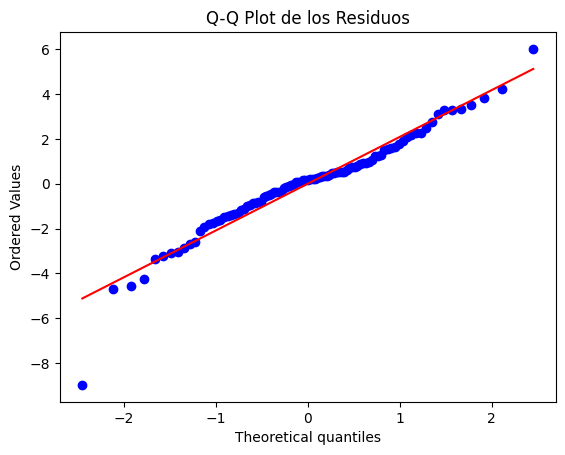

In [99]:
stats.probplot(df['residuo'], dist='norm', plot=plt)
plt.title('Q-Q Plot de los Residuos')
plt.show()

**2. Interpreta el gráfico:**

**a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal**

Se observa que la mayoría de los puntos se aproximan a la línea diagonal, lo que indica que es una distribución casí normal.


**b) Desviaciones sistemáticas indican asimetría o colas pesadas**

Como se comentó hay distribución casí normal sin embargo existen algunas desviaciones que indican una asimetría en la distribución de los residuos.

## ***Parte 5: Evaluación del modelo***
**1. Calcula las métricas:**
- MSE
- RMSE
- R²

In [100]:
mse = mean_squared_error(df['profit'], df['y_pred'])
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

r2 = r2_score(df['profit'], df['y_pred'])
print(f'R²: {r2}')

MSE: 10.475339942586363
RMSE: 3.236562982947553
R²: 0.6514026443160463


**2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?**

Un valor bajo en RMSE y R² junto con un valor alto MSE sugiere que el modelos se ajusta bien a los datos.



## ***Parte 6: Conclusiones***
**Responde con tus propias palabras:**

- ¿Qué tan útil consideras el modelo?
  
  Desde mi punto de vista considero que el modelo es apropiado

- ¿Qué limitaciones encuentras?


- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.